# Data Preprocessing

In [1]:
#import necessary packages
import numpy as np
import pandas as pd

In [2]:
#open files


subscribers=pd.read_csv('subscribers.csv')
subscribers.head()

spend=pd.read_csv('channel_spend_graduate.csv')
spend.head()


,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90


In [3]:
#check the structure of both files
subscribers.shape
spend.shape

(40, 3)

## basic preprocessing

In [4]:
# drop the first column with no name
subscribers.drop('Unnamed: 0',axis=1,inplace=True)
subscribers


,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,...,0.3303,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True
227624,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,UAE,...,0.3303,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True
227625,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,UAE,...,0.0367,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True
227626,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,...,NaN,ar,Paypal,14,True,1,2020-01-31 23:58:51,2020-05-31 23:58:51,NaN,True


In [5]:
subscribers.info()
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         227628 non-null  int64  
 1   package_type                  192054 non-null  object 
 2   num_weekly_services_utilized  117178 non-null  float64
 3   preferred_genre               191302 non-null  object 
 4   intended_use                  224079 non-null  object 
 5   weekly_consumption_hour       189698 non-null  float64
 6   num_ideal_streaming_services  115458 non-null  float64
 7   age                           192459 non-null  float64
 8   male_TF                       227359 non-null  object 
 9   country                       227628 non-null  object 
 10  attribution_technical         227628 non-null  object 
 11  attribution_survey            224984 non-null  object 
 12  op_sys                        214253 non-nul

In [6]:
# drop or modify the columns after profiling
subscribers.drop(['country','months_per_bill_period','language'],axis=1,inplace=True)
subscribers = subscribers[subscribers['age'] <= 90]
subscribers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191563 entries, 1 to 227627
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         191563 non-null  int64  
 1   package_type                  156202 non-null  object 
 2   num_weekly_services_utilized  116761 non-null  float64
 3   preferred_genre               155456 non-null  object 
 4   intended_use                  188061 non-null  object 
 5   weekly_consumption_hour       188808 non-null  float64
 6   num_ideal_streaming_services  115045 non-null  float64
 7   age                           191563 non-null  float64
 8   male_TF                       191559 non-null  object 
 9   attribution_technical         191563 non-null  object 
 10  attribution_survey            188961 non-null  object 
 11  op_sys                        178577 non-null  object 
 12  plan_type                     191563 non-nul

In [9]:
#generate data analytics report
#!pip install pandas-profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(subscribers, title='subscribers')
profile.to_file(r"subscribers.html")

In [ ]:
#change some columns to strings
subscribers['preferred_genre'] = subscribers['preferred_genre'].astype(str)
subscribers['package_type'] = subscribers['package_type'].astype(str)
subscribers['intended_use'] = subscribers['intended_use'].astype(str)
subscribers['op_sys'] = subscribers['op_sys'].astype(str)
subscribers['payment_type'] = subscribers['payment_type'].astype(str)

# A/B testing

in this part, I am going to conduct an AB testing to understand what marketing strategies have been most effective to date

In [7]:
# find the columns of the "subscribers" file
subscribers.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF',
       'attribution_technical', 'attribution_survey', 'op_sys', 'plan_type',
       'monthly_price', 'discount_price', 'account_creation_date',
       'trial_end_date', 'initial_credit_card_declined', 'join_fee',
       'payment_type', 'num_trial_days', 'current_sub_TF', 'payment_period',
       'last_payment', 'next_payment', 'cancel_date', 'trial_completed'],
      dtype='object')

In [8]:
# check the number of strategies applied
# plan_type means pricing plan type, trial fee and duration
subscribers['plan_type'].value_counts()

base_uae_14_day_trial                191032
high_uae_14_day_trial                   325
low_uae_no_trial                        166
base_eur_14_day_trial                    18
high_sar_14_day_trial                    12
low_gbp_14_day_trial                      4
high_aud_14_day_trial                     2
low_eur_no_trial                          1
low_sar_no_trial                          1
base_uae_no_trial_7_day_guarantee         1
high_jpy_14_day_trial                     1
Name: plan_type, dtype: int64

In [9]:
#check the number of users
subscribers['current_sub_TF'].value_counts()

True     105465
False     86098
Name: current_sub_TF, dtype: int64

In [10]:
subscribers['current_sub_TF'] = subscribers['current_sub_TF'].astype(float)
subscribers.head()

#segmenting the customers
gb= subscribers.groupby(['plan_type']).sum()['current_sub_TF']
gb

<ipython-input-10-5bd5ccf36fe5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subscribers['current_sub_TF'] = subscribers['current_sub_TF'].astype(float)


plan_type
base_eur_14_day_trial                    10.0
base_uae_14_day_trial                105224.0
base_uae_no_trial_7_day_guarantee         1.0
high_aud_14_day_trial                     1.0
high_jpy_14_day_trial                     1.0
high_sar_14_day_trial                     2.0
high_uae_14_day_trial                   179.0
low_eur_no_trial                          0.0
low_gbp_14_day_trial                      2.0
low_sar_no_trial                          0.0
low_uae_no_trial                         45.0
Name: current_sub_TF, dtype: float64

In [11]:
#merge the columns to find the conversion rate
dataframe = pd.DataFrame(list(gb),index=gb.index, columns=['current_sub_TF']).merge(subscribers['plan_type'].value_counts(),left_on=None, right_on=None, left_index=True, right_index=True)
dataframe.columns = ['sub','total']
dataframe['conversion_rate'] = dataframe['sub']/dataframe['total']
dataframe

,sub,total,conversion_rate
base_eur_14_day_trial,10.0,18,0.555556
base_uae_14_day_trial,105224.0,191032,0.550819
base_uae_no_trial_7_day_guarantee,1.0,1,1.000000
high_aud_14_day_trial,1.0,2,0.500000
high_jpy_14_day_trial,1.0,1,1.000000
high_sar_14_day_trial,2.0,12,0.166667
high_uae_14_day_trial,179.0,325,0.550769
low_eur_no_trial,0.0,1,0.000000
low_gbp_14_day_trial,2.0,4,0.500000
low_sar_no_trial,0.0,1,0.000000


In [12]:
#

subscribers = subscribers[subscribers['plan_type'].isin(['base_uae_14_day_trial','high_uae_14_day_trial'])]
subscribers['plan_type'].value_counts()
subscribers['plan_type'] = subscribers['plan_type'].apply(lambda x: 'A' if x == 'base_uae_14_day_trial' else 'B')
subscribers['plan_type']

1         A
2         A
3         A
4         A
5         A
         ..
227622    A
227623    A
227624    A
227625    A
227627    A
Name: plan_type, Length: 191357, dtype: object

In [13]:
#group the variants
a=subscribers.groupby('plan_type')['current_sub_TF'].value_counts()
a_df = pd.DataFrame(a)
a_df

current_sub_TF
plan_type current_sub_TF                
A         1.0                     105224
          0.0                      85808
B         1.0                        179
          0.0                        146

In [14]:
a_df.index

MultiIndex([('A', 1.0),
            ('A', 0.0),
            ('B', 1.0),
            ('B', 0.0)],
           names=['plan_type', 'current_sub_TF'])

## conducting the test

In [15]:
A_False=a_df.loc[('A',0), 'current_sub_TF']
print(A_False)
A_True=a_df.loc[('A',1), 'current_sub_TF']
print(A_True)
B_True=a_df.loc[('B',1), 'current_sub_TF']
print(B_True)
B_False=a_df.loc[('B',0), 'current_sub_TF']
print(B_False)

85808
105224
179
146


In [ ]:
p=A_True/(A_False+A_True)
p

In [ ]:
p_hat=B_True/(B_True+B_False)
p_hat

In [ ]:
import math
z=(p_hat-p)/math.sqrt(p_hat*(1-p_hat)/5000)
z

In [ ]:
if math.fabs(z) >=1.64:
        print('z score is %f. Reject the null hypotheis and conclude that Alternative B improved conversion rates over alternative A.' %(z))
else:
        print('z score is %f. Fail to reject the null hypothesis and conclude that Alternative B did not improve conversion rates over alternative A.'%(z))
        

## Calculate optimal sample size

In [24]:
# Calculate optimal sample size (beta=0.2)
p0 = 0.534073
p1 = 0.550819
p2 = 0.550769
p_average=(p1+p2)/2
delta = p2-p1

import scipy.stats as st
import math
t_0025=st.norm.ppf(0.975)
t_0025
t_02=st.norm.ppf(0.8)
t_02

a = t_0025 * math.sqrt(2*p_average*(1-p_average))
b = t_02 * math.sqrt(p1*(1-p1)+p2*(1-p2))
delta = p2-p1
sample_size = ((a+b) * (a+b)) / ((delta)*(delta))   
sample_size

print("The optimal sample size is {}".format(sample_size))

The optimal sample size is 1553575666.808724


# Customer Segmentation

## Determining which variables to be used

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [26]:
#however, it seems to be too large for the computer to operate, so we need to reduce the number of variables used.
#drop the rows with NA value
subscribers.drop(['join_fee','num_weekly_services_utilized','op_sys','attribution_survey','cancel_date','initial_credit_card_declined','payment_period','trial_end_date','account_creation_date','last_payment','next_payment'],axis=1,inplace=True)
subscribers.dropna(inplace=True)
# drop the columns that are useless for clustering and segmentation
subscribers.head()

,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,plan_type,monthly_price,discount_price,payment_type,num_trial_days,current_sub_TF,trial_completed
6,29726122,base,comedy,access to exclusive content,20.051667,2.0,61.0,False,bing,A,4.7343,4.5141,Standard Charter,14,1.0,True
7,20299962,base,drama,access to exclusive content,34.551230,2.0,23.0,False,email,A,4.7343,4.5141,RAKBANK,14,1.0,True
20,21511732,enhanced,comedy,replace OTT,27.301448,2.0,26.0,False,organic,A,4.7343,4.5141,RAKBANK,14,1.0,True
27,20668260,economy,drama,access to exclusive content,21.501623,3.0,49.0,False,facebook,A,4.7343,4.5141,RAKBANK,14,1.0,True
28,21447938,base,drama,replace OTT,30.201361,2.0,59.0,False,display,A,4.7343,4.5141,RAKBANK,14,0.0,False


In [27]:
#use get_dummies function to change those qualitative columns into binary ones
subscribers_encoded = pd.get_dummies(subscribers)
subscribers_encoded

,subid,weekly_consumption_hour,num_ideal_streaming_services,age,monthly_price,discount_price,num_trial_days,current_sub_TF,trial_completed,package_type_base,...,attribution_technical_vod,attribution_technical_youtube,plan_type_A,plan_type_B,payment_type_Apple Pay,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter
6,29726122,20.051667,2.0,61.0,4.7343,4.5141,14,1.0,True,1,...,0,0,1,0,0,0,0,0,0,1
7,20299962,34.551230,2.0,23.0,4.7343,4.5141,14,1.0,True,1,...,0,0,1,0,0,0,0,0,1,0
20,21511732,27.301448,2.0,26.0,4.7343,4.5141,14,1.0,True,0,...,0,0,1,0,0,0,0,0,1,0
27,20668260,21.501623,3.0,49.0,4.7343,4.5141,14,1.0,True,0,...,0,0,1,0,0,0,0,0,1,0
28,21447938,30.201361,2.0,59.0,4.7343,4.5141,14,0.0,False,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227603,26067054,27.301448,2.0,55.0,4.7343,4.5141,14,0.0,False,1,...,0,0,1,0,0,0,0,0,0,1
227608,29190645,25.851492,2.0,46.0,4.7343,4.5141,14,1.0,True,0,...,0,0,1,0,0,0,0,0,1,0
227612,21731043,28.751405,2.0,55.0,4.7343,4.5141,14,1.0,True,0,...,0,0,1,0,0,0,0,1,0,0
227616,26828621,27.301448,2.0,44.0,4.7343,4.5141,14,1.0,True,1,...,0,0,1,0,0,0,0,0,0,1


In [28]:
# minmax scaler (this part is referred from HW2)
scaler = MinMaxScaler()
train_X,test_X = train_test_split(subscribers_encoded, test_size=0.3, random_state=930)
X_train = scaler.fit_transform(train_X)
X_test = scaler.transform(test_X)

X = scaler.transform(subscribers_encoded)


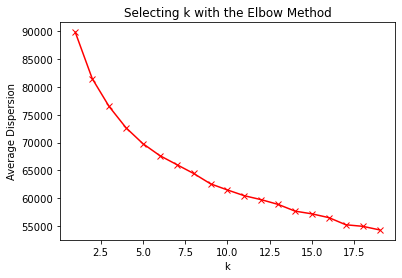

In [34]:
# KMeans
# choose k value with elbow method
K = range(1, 20)
meanDispersions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)

    meanDispersions.append(kmeans.inertia_)

plt.plot(K, meanDispersions, 'rx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show() 

# From the graph I would select k=4 as the optimal number of clusters

# cluster
kmeans = KMeans(n_clusters=4)

y1 = kmeans.fit_predict(X_train)
y2 = kmeans.predict(X_test)
whole_data = kmeans.predict(X)

#generate two subsets with data generated from last step 
train = pd.DataFrame(train_X,columns = subscribers_encoded.columns)
test = pd.DataFrame(test_X,columns = subscribers_encoded.columns)
#then add the prediction of clustering to these data
train['Cluster'] = y1
test['Cluster'] = y2
subscribers_encoded['Cluster'] = whole_data
subscribers_encoded.to_csv('clustered.csv')

In [31]:
# check the outcomes of each cluster
groupby = subscribers_encoded.groupby(by='Cluster').mean()
groupby.to_csv('clusters.csv')

# churn model 

## building the CART model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
subscribers_classification = subscribers.copy()
#from the previous step, use all features.
subscribers_classification.info()

In [ ]:
#change the outcome variable as 0/1
subscribers_classification['current_sub_01'] = subscribers_classification['current_sub_TF'].apply(lambda x: 1 if x>0 else 0)
subscribers_classification.drop(['current_sub_TF'],axis=1,inplace=True)
subscribers_classification['preferred_genre'] = subscribers_classification['preferred_genre'].astype(str)
subscribers_classification['package_type'] = subscribers_classification['package_type'].astype(str)
subscribers_classification['intended_use'] = subscribers_classification['intended_use'].astype(str)
subscribers_classification['payment_type'] = subscribers_classification['payment_type'].astype(str)
subscribers_classification.head(5)


In [ ]:
classification_encoded = pd.get_dummies(subscribers_classification)
classification_encoded.info()

In [ ]:
from sklearn.metrics import plot_roc_curve
label = classification_encoded.current_sub_01
X=classification_encoded.drop(['current_sub_01'],axis=1,inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.3, random_state=930)

decision_tree = tree.DecisionTreeClassifier(max_depth=3)
decision_tree = decision_tree.fit(X_train, y_train)

tree_disp = plot_roc_curve(decision_tree, X_test, y_test)

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
# reduce some highly correlated features
subscribers_classification1 = subscribers_classification.drop(['monthly_price'],axis=1,inplace=False)
subscribers_classification1.info()

In [ ]:
#change the size of the training set
classification_encoded1 = pd.get_dummies(subscribers_classification1)
label = classification_encoded1.current_sub_01
X2=classification_encoded1.drop(['current_sub_01'],axis=1,inplace=False)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, label, test_size=0.3, random_state=930)
decision_tree2 = tree.DecisionTreeClassifier(max_depth=3)
decision_tree2 = decision_tree2.fit(X_train, y_train)
tree_disp = plot_roc_curve(decision_tree2, X_test, y_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y2_pred = decision_tree2.predict(X2_test)
cm2 = confusion_matrix(y2_test, y2_pred)

cm_display = ConfusionMatrixDisplay(cm2).plot()

In [ ]:
#changing max_depth
from sklearn.metrics import plot_roc_curve
label = classification_encoded.current_sub_01
X=classification_encoded.drop(['current_sub_01'],axis=1,inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.3, random_state=930)

decision_tree = tree.DecisionTreeClassifier(max_depth=10)
decision_tree = decision_tree.fit(X_train, y_train)

tree_disp = plot_roc_curve(decision_tree, X_test, y_test)

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()